In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.datasets import cifar10

from scriptss.load_data import load_train, load_test

## CNN bouwen

In [2]:
# Het importeren en bewerken van de data 
train_images, train_labels = load_train()
test_images, test_labels = load_test()

# Normalizeren van de images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images[0].shape)
# Reshapen van de images zodat ze de juiste dimensies hebben
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

(28, 31)


In [6]:
## Onze CNN

# Stap 1: bepaal hoeveel filters je wilt, hoe groot je filter size moet zijn (let op je filter size 
# mag niet te groot zijn vergeleken met je images), en wat je pool size is. 
num_filters = 3
filter_size = (28 * 31) #868
pool_size = 100

# Stap 2: maak het model.
#    In de array die je aan sequential meegeeft, zet je alle layers die in het model moeten:
#    Conv2D, parameters: num_filters, filter_size, input_shape=(x, y, z)
#    MaxPooling2D, parameters: pool_size=pool_size
#    Flatten,
#    Dense, parameters: aantal outputs, activation='softmax'

model = Sequential([])
model.add(Conv2D(3, (3, 3), padding='same', activation='relu', input_shape=train_images.shape[1:]))
model.add(Conv2D(5, (3, 3), padding='same', activation='relu', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#model.summary()

In [7]:
# Stap 3: het compilen van het model. 
# model.compile parameters: 'adam', loss='categorial_crossentropy', metrics=['accuracy']
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Stap 4: fit het model. 
#    Data om op te trainen: train_images, to_categorial(train_labels)
#    epochs = 3
#    validation_data = test_images, to_categorial(test_labels)
model.fit(train_images, train_labels, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5534 - accuracy: 0.8456
Epoch 2/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1283 - accuracy: 0.9624
Epoch 3/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9729
Epoch 4/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0636 - accuracy: 0.9795
Epoch 5/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9833
Epoch 6/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9870
Epoch 7/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0371 - accuracy: 0.9880
Epoch 8/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0312 - accuracy: 0.9904
Epoch 9/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0250 - accuracy: 0.9925


In [8]:
# Stap 5: evalueer het model
test_loss, test_acc = model.evaluate(test_images,  test_labels)#, verbose=2)#to_categorical(test_labels), verbose=2)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.9796 - accuracy: 0.7496
0.7495999932289124


In [ ]:
# Stap 6: extra layer(s). Wat gebeurt er als je een extra Conv Layer toevoegd aan je model? 
#    Voeg een extra layer(s) toe en train het model opnieuw. 
# Stap 7: parameters. Wat gebeurt er bijvoorbeeld als je geen softmax gebruikt maar een andere activatie? 
#    Pas op z'n minst 1 parameter aan en train je model opnieuw. 

#(softmax ipv relu verminderd de accuracy van 90% naar 70%)
#Een Dense (relu) layer minder maakt nauwelijks verschil

predictions = model.predict([test_images])

import random
index = random.randint(0,len(test_images))
print("index: " + str(index))
print(np.argmax(predictions[index]))
plt.imshow(test_images[index])
plt.show()

## CIFAR-10

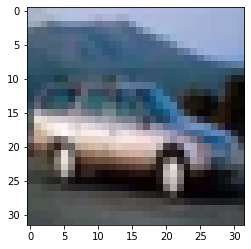

(50000, 32, 32, 3)
[9]


In [13]:
# Data inladen
(train_images10, train_labels10), (test_images10, test_labels10) = cifar10.load_data()

plt.imshow(train_images10[4])
plt.show()

# Normalizeren
train_images10, test_images10 = train_images10 / 255.0, test_images10 / 255.0
print(train_images10.shape)
print(train_labels10[1])

In [ ]:
# Stap 8: bouw je eigen CNN voor de CIFAR-10 dataset. 
# Tip: gebruik meerdere Conv2D en MaxPooling layers
# LET OP: gebruik 'softmax' alleen bij je laatste Dense layer. Gebruik 'relu' voor de andere Conv2D/Dense layers. 

input_shape = (32, 32, 3)
n_classes = 10

model_cif = Sequential([])

model_cif.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model_cif.add(Conv2D(32, (3, 3), activation='relu'))
model_cif.add(MaxPooling2D(pool_size=(2,2)))
model_cif.add(Dropout(0.4))

model_cif.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cif.add(Conv2D(64, (3, 3), activation='relu'))
model_cif.add(MaxPooling2D(pool_size=(2,2)))
model_cif.add(Dropout(0.4))

model_cif.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cif.add(Conv2D(64, (3, 3), activation='relu'))
model_cif.add(MaxPooling2D(pool_size=(2,2)))
model_cif.add(Dropout(0.4))

model_cif.add(Flatten())
model_cif.add(Dense(512, activation='relu'))
model_cif.add(Dropout(0.5))
model_cif.add(Dense(n_classes, activation='softmax'))

model_cif.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
model_cif.fit(
  train_images10,
  to_categorical(train_labels10),
  epochs= 15,#hint: meer dan 3,
  validation_data=(test_images10, to_categorical(test_labels10)),
)

model_cif.summary()

In [9]:
#model_cif.save(r'C:\Users\Milo\OneDrive - Stichting Hogeschool Utrecht\Jaar 2\Blok 3\VISN\ML-Workshop-CNN\first-cifar-10.model')

loaded_cif_model = tf.keras.models.load_model(r'C:\Users\Milo\OneDrive - Stichting Hogeschool Utrecht\Jaar 2\Blok 3\VISN\ML-Workshop-CNN\first-cifar-10.model')
#loaded_cif_model.fit(
#  train_images10,
#  to_categorical(train_labels10),
#  epochs= 10,#hint: meer dan 3,
#  validation_data=(test_images10, to_categorical(test_labels10)),
#)

In [10]:
#loaded_cif_model.save(r'C:\Users\Milo\OneDrive - Stichting Hogeschool Utrecht\Jaar 2\Blok 3\VISN\ML-Workshop-CNN\first-cifar-10.model')


In [14]:
test_loss, test_acc = loaded_cif_model.evaluate(test_images10,  to_categorical(test_labels10), verbose=2)

313/313 - 3s - loss: 0.8000 - accuracy: 0.7287


In [15]:
print(test_acc)

0.7286999821662903


## Bronnen
* https://victorzhou.com/blog/keras-cnn-tutorial/ Bezocht: 9/3/2020
* https://www.tensorflow.org/tutorials/images/cnn Bezocht: 13/3/2020